# Import visualiser module

In [1]:
import importlib

In [2]:
from visualiser import *
import visualiser
importlib.reload(visualiser)

<module 'visualiser' from '/home/maciektr/Programowanie/geometric_algorithms_project/visualiser.py'>

<IPython.core.display.Javascript object>


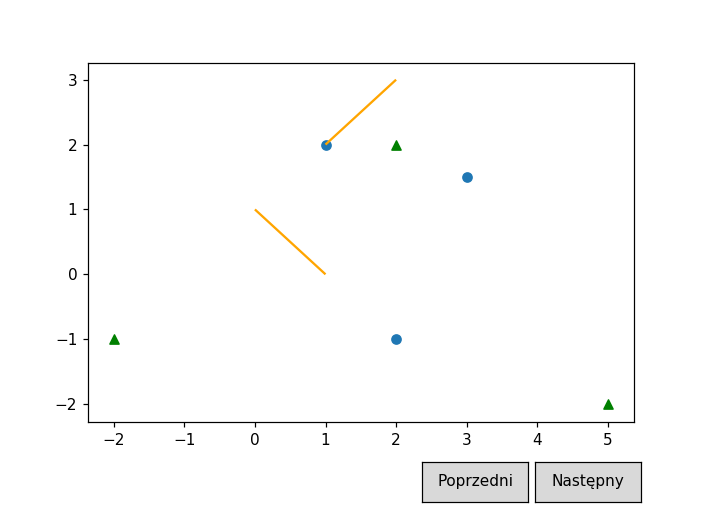

In [3]:
%matplotlib notebook
scenes = [Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]),
                     PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker="^")],
                    [LinesCollection([[(1, 2), (2, 3)], [(0, 1), (1, 0)]], 'orange')]),
              Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'),
                     PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')],
                    [LinesCollection([[(-1, 2), (-2, 3)], [(0, -1), (-1, 0)]])])]

plot = Plot(scenes)
plot.draw()


## Create / Import some test cases

In [4]:
import generator 
test1 = generator.test_case_1()
test2 = generator.test_case_2()
scope = (10,100,10,60)
area = [[(scope[0],scope[2]),(scope[0],scope[3])],[(scope[1],scope[2]),(scope[1],scope[3])],
        [(scope[0],scope[2]),(scope[1],scope[2])],[(scope[0],scope[3]),(scope[1],scope[3])]]

# QuadTree

In [5]:
import quadtree

## QuadTree implementation

In [6]:
tree = quadtree.Quadtree(test1)

In [7]:
solution,listoflines_solution = tree.find(*scope)
listoflines_creation = tree.linesinit
print(solution)

[(20, 10), (60, 10), (60, 40)]


<IPython.core.display.Javascript object>


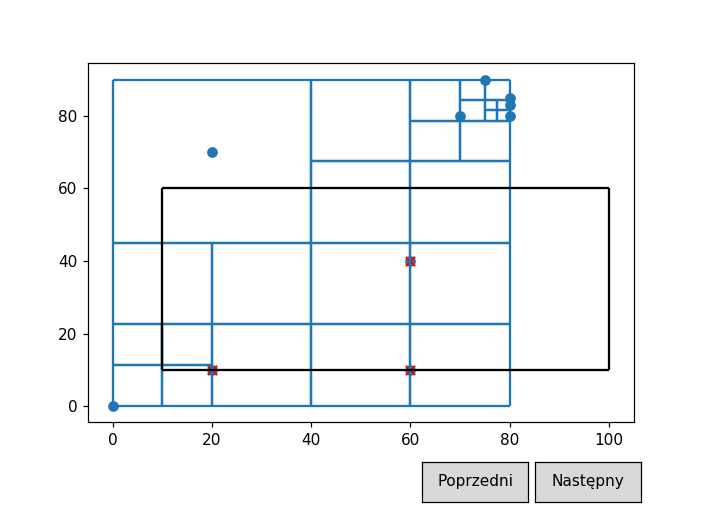

In [8]:
treelines=tree.get_lines()
scenes = [Scene([PointsCollection(test1),
                     PointsCollection(solution, color='red', marker="x")], 
               [LinesCollection(treelines), LinesCollection(area, color='black')])]
    
plot = Plot(scenes)
plot.draw()


### Konstrukcja drzewa

<IPython.core.display.Javascript object>


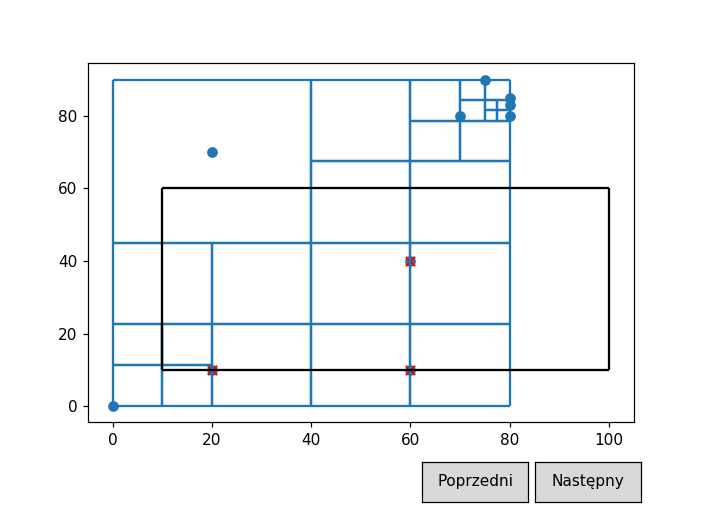

In [9]:
scenescreation=[Scene([PointsCollection(test1),
                     PointsCollection(solution, color='red', marker="x")], 
               [LinesCollection(treelines), LinesCollection(area, color='black')])]

for lines in listoflines_creation:
    scenescreation += [Scene([PointsCollection(test1)],
                             [LinesCollection(treelines), LinesCollection(lines, color='orange')])]

plot = Plot(scenescreation)
plot.draw()


### Przeszukiwanie zbioru punktów

<IPython.core.display.Javascript object>


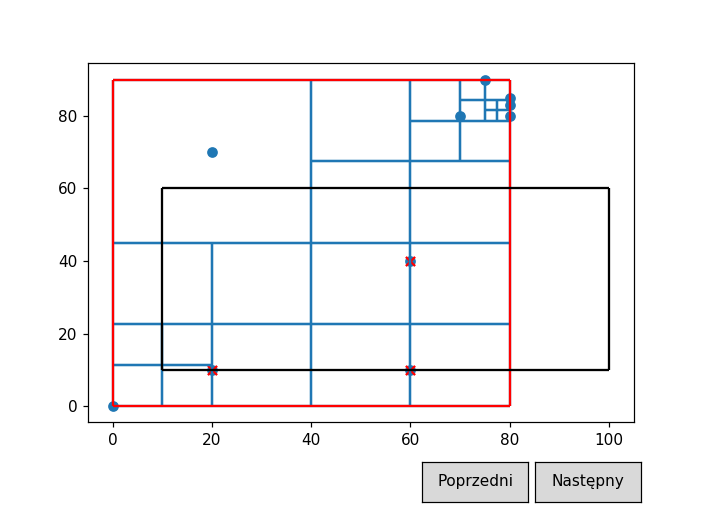

In [10]:
scenessolution=[Scene([PointsCollection(test1),
                     PointsCollection(solution, color='red', marker="x")], 
               [LinesCollection(treelines), LinesCollection(area, color='black')])]
    
for lines in listoflines_solution:
    scenessolution += [Scene([PointsCollection(test1), PointsCollection(solution, color='red', marker="x")],
                             [LinesCollection(treelines), LinesCollection(lines, color='red'),
                             LinesCollection(area, color='black')])]
    
plot = Plot(scenessolution)
plot.draw()
    

## KD-Tree

In [11]:
import kdtree
importlib.reload(kdtree)

<module 'kdtree' from '/home/maciektr/Programowanie/geometric_algorithms_project/kdtree.py'>

In [12]:
kd_visualiser = visualiser.KdtreeVisualiser()
kd = kdtree.Kdtree(test1, kd_visualiser)

### Konstrukcja drzewa

<IPython.core.display.Javascript object>


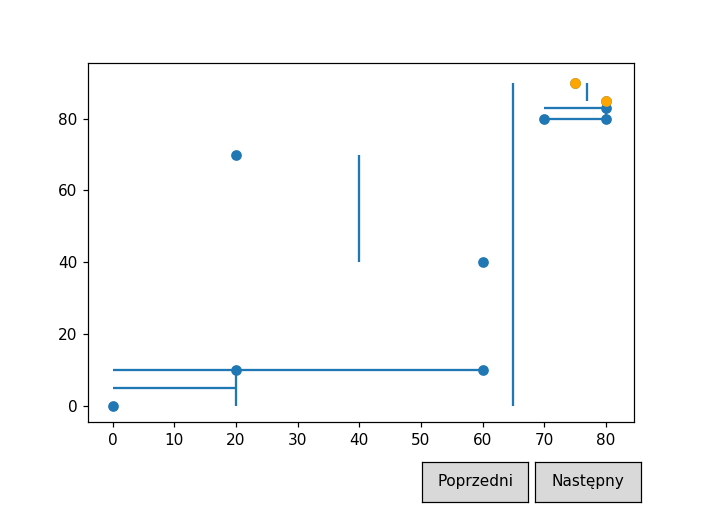

In [13]:
plot2 = Plot(kd_visualiser.get_scenes())
plot2.draw()

### Przeszukanie zbioru punktów

In [14]:
solution_kd = kd.find(*scope)
print(solution_kd)

[(20, 10), (60, 10), (60, 40)]


<IPython.core.display.Javascript object>


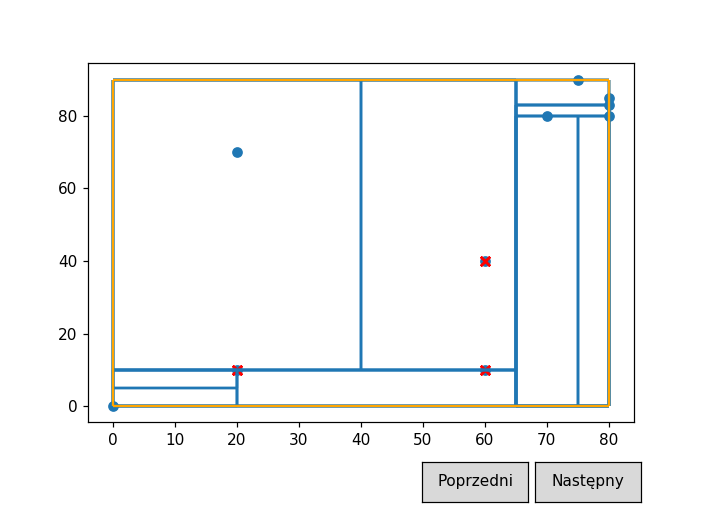

In [15]:
plot2 = Plot(kd_visualiser.get_scenes())
plot2.draw()

<IPython.core.display.Javascript object>


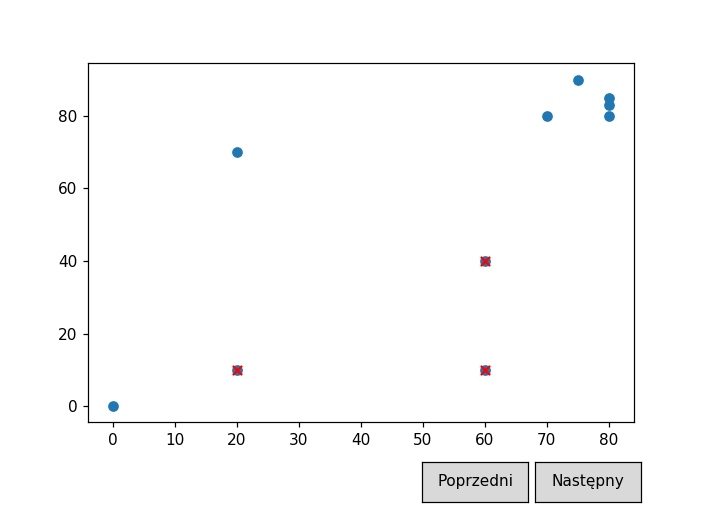

In [16]:
scenes = [Scene([PointsCollection(test1),
                     PointsCollection(solution_kd, color='red', marker="x")])]
plot = Plot(scenes)
plot.draw()
